In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

from pysodes.odeint import integrate_const

plt.rcParams.update({'font.size': 16})

In [2]:
def lotka_volterra(z, dzdt, t):
    x, y = z

    a = 1.5
    b = 1.0
    c = 3.0
    d = 1.0

    dzdt[0] = a*x - b*x*y
    dzdt[1] = -c*y + d*x*y

    return dzdt


def lotka_volterra_scipy(t, z):
    x, y = z

    a = 1.5
    b = 1.0
    c = 3.0
    d = 1.0

    dxdt = [
        a*x - b*x*y,
        -c*y + d*x*y
    ]
    return dxdt

In [3]:
t_span = (0., 20.)
dt = 0.01
N = int((t_span[1] - t_span[0]) / dt)
t_eval_scipy = np.linspace(t_span[0], t_span[1], N)
y0 = np.array([10., 5.])
odeint_method = 'runge_kutta4'
N

2000

In [4]:
%%timeit
time, solution = integrate_const(lotka_volterra, t_span, dt, y0, method=odeint_method)

30.4 ms ± 804 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
time, solution = integrate_const(lotka_volterra, t_span, dt, y0, method=odeint_method)
print(solution[-1])

[1.96208496 0.02213501]


In [6]:
%%timeit
result = solve_ivp(lotka_volterra_scipy, t_span, y0, t_eval=t_eval_scipy, method='RK45')

15.1 ms ± 204 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
result = solve_ivp(lotka_volterra_scipy, t_span, y0, t_eval=t_eval_scipy, method='RK45')
solution_scipy = result.y.T
solution_scipy[-1]

array([1.49201883, 0.02446714])

In [8]:
result_ref = solve_ivp(lotka_volterra_scipy, t_span, y0, t_eval=t_eval_scipy, method='Radau')
result_ref.y[:,-1]

array([1.98741997, 0.02191672])

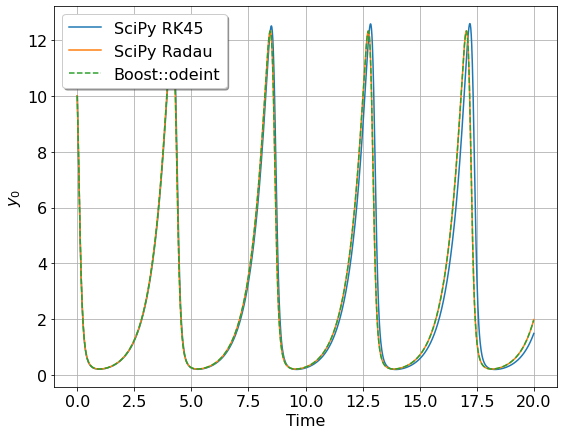

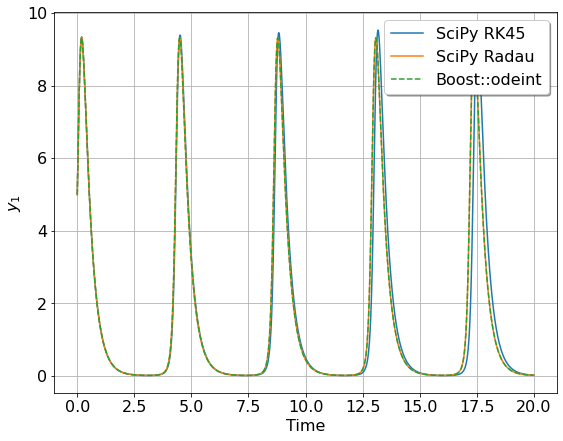

In [9]:
state_len = solution.shape[1]

for state_var in range(state_len):

    plt.figure(figsize=(9, 7))

    plt.plot(result.t, result.y[state_var, :], label='SciPy RK45')
    plt.plot(result_ref.t, result_ref.y[state_var, :], label='SciPy Radau')
    plt.plot(time, solution[:, state_var], '--', label='Boost::odeint')

    plt.xlabel("Time")
    plt.ylabel(rf"$y_{state_var}$")

    plt.legend(shadow=True)
    plt.grid(True)
    
    plt.savefig(f"system_y{state_var}.png", dpi=300)
    plt.show()